In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

np.random.seed(10)

# Read MNIST data
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()

# Translation of data
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Standardize feature data
X_Train4D_norm = X_Train4D / 255
X_Test4D_norm = X_Test4D /255

# Label Onehot-encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

model = Sequential()
# Create CN layer 1
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu',
                 name='conv2d_1'))
# Create Max-Pool 1
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))

# Create CN layer 2
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu',
                 name='conv2d_2'))

# Create Max-Pool 2
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))

# Add Dropout layer
model.add(Dropout(0.25, name='dropout_1'))

In [4]:
model.add(Flatten(name='flatten_1'))

In [5]:

model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5, name='dropout_2'))

In [6]:
model.add(Dense(10, activation='softmax', name='dense_2'))

In [7]:
model.summary()
print("")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 36)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1764)              0

In [8]:
# 定義訓練方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 開始訓練
train_history = model.fit(x=X_Train4D_norm,
                          y=y_TrainOneHot, validation_split=0.2,
                          epochs=10, batch_size=300, verbose=1)

Epoch 1/10
160/160 [==============================] - 99s 607ms/step - loss: 0.5035 - accuracy: 0.8422 - val_loss: 0.0964 - val_accuracy: 0.9708
Epoch 2/10
160/160 [==============================] - 68s 428ms/step - loss: 0.1386 - accuracy: 0.9584 - val_loss: 0.0636 - val_accuracy: 0.9805
Epoch 3/10
160/160 [==============================] - 68s 424ms/step - loss: 0.1028 - accuracy: 0.9695 - val_loss: 0.0504 - val_accuracy: 0.9852
Epoch 4/10
160/160 [==============================] - 68s 422ms/step - loss: 0.0818 - accuracy: 0.9755 - val_loss: 0.0445 - val_accuracy: 0.9868
Epoch 5/10
160/160 [==============================] - 66s 415ms/step - loss: 0.0693 - accuracy: 0.9788 - val_loss: 0.0401 - val_accuracy: 0.9889
Epoch 6/10
160/160 [==============================] - 68s 428ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 7/10
160/160 [==============================] - 68s 423ms/step - loss: 0.0561 - accuracy: 0.9835 - val_loss: 0.0344 - val_ac

In [9]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

def plot_images_labels_predict(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "l=" + str(labels[idx])
        if len(prediction) > 0:
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title = "l={}".format(str(labels[idx]))
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

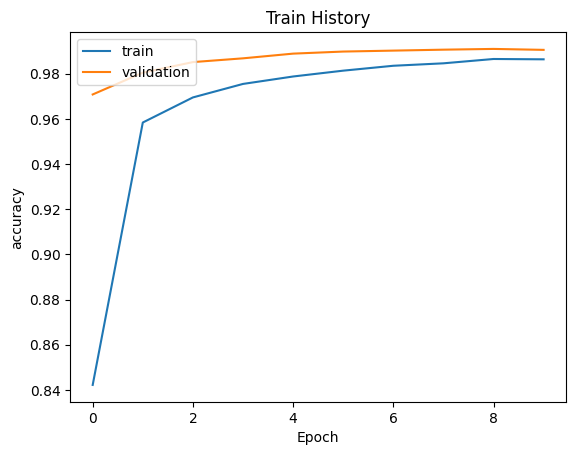

In [19]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

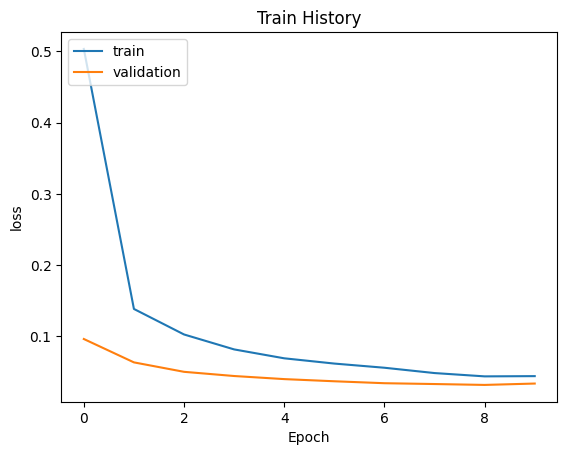

In [11]:
show_train_history(train_history, 'loss', 'val_loss')

In [12]:

scores = model.evaluate(X_Test4D_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 5s 17ms/step - loss: 0.0246 - accuracy: 0.9917

	[Info] Accuracy of testing data = 99.2%
